In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
N = 101
x = np.linspace(0, 1, N).reshape(-1, 1)

In [3]:
a = 0.2
K = np.exp(-(x-x.T)**2/a**2) + np.eye(N)*0.00001

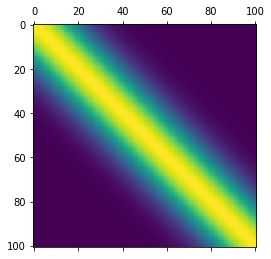

In [4]:
_ = plt.matshow(K)

In [5]:
L = np.linalg.cholesky(K)

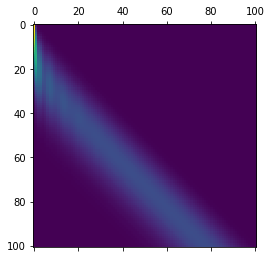

In [6]:
_ = plt.matshow(L)

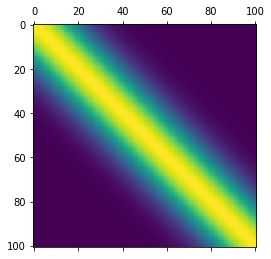

In [9]:
_ = plt.matshow(L.dot(L.T))

Sample from the Gaussian Process by use of the Cholesky decomposition of the Kernel matrix

In [10]:
n_sample = 50000
u = np.random.randn(N, n_sample)

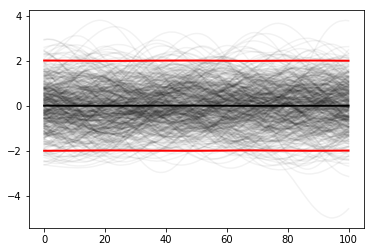

In [11]:
X = L.dot(u)
_ = plt.plot(X[:, np.random.permutation(n_sample)[:500]], c='k', alpha=0.05)
_ = plt.plot(X.mean(axis=1), c='k', linewidth=2)
_ = plt.plot(2*X.std(axis=1), c='r', linewidth=2)
_ = plt.plot(-2*X.std(axis=1), c='r', linewidth=2)

Sample from the posterior given points at (0.1, 0.0), (0.5, 1.0)

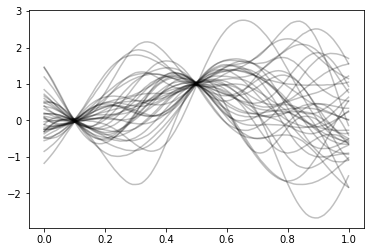

In [12]:
_ = plt.plot(x, X[:, (np.abs(X[np.where(x == 0.1)[0][0], :] - 0.0) < 0.05) &
                  (np.abs(X[np.where(x == 0.5)[0][0], :] -1) < 0.05)], 
             c='k', alpha=0.25)